### Regression Analysis

In [197]:
# Warning for handling warning messages
import warnings
warnings.filterwarnings(action='ignore')
# https://stackoverflow.com/questions/9031783/hide-all-warnings-in-ipython

In [198]:
# Numpy for data management
import numpy as np

# Pandas also for data management
import pandas as pd

# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns
sns.set_style("darkgrid")

# Stats modules
import statsmodels.api as sm
import scipy.stats as stats

# Auxiliar libraries
from sklearn.metrics import r2_score

## a) Select two features in your dataset with more or less “linear‐like” scatterplot. Display the scatter‐plot, and make a comment on it

In [199]:
# Defining the col_names
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX' ,'PTRATIO', 'B' , 'LSTAT' , 'MEDV']

# Read the CSV file with new column names
data = pd.read_csv('housing.csv', header=0, delim_whitespace=True, names=col_names)

# Print the first few rows of the data frame
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


[Text(0.5, 0, 'RM'), Text(0, 0.5, 'MEDV')]

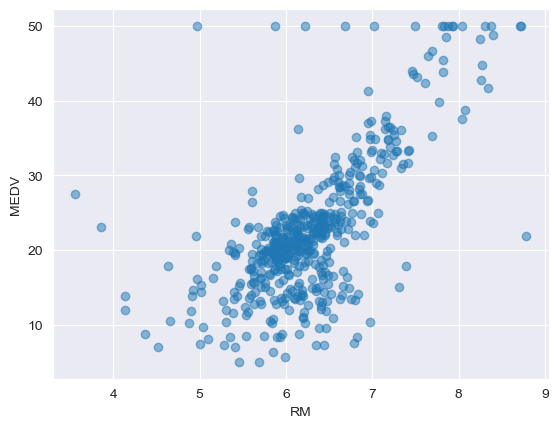

In [200]:
# Extract the required columns
x = data['RM']
y = data['MEDV']

# Plot the scatter plot
ax = sns.regplot(x=x, y=y, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='RM', ylabel='MEDV')

Quick vairables visualization

<AxesSubplot:>

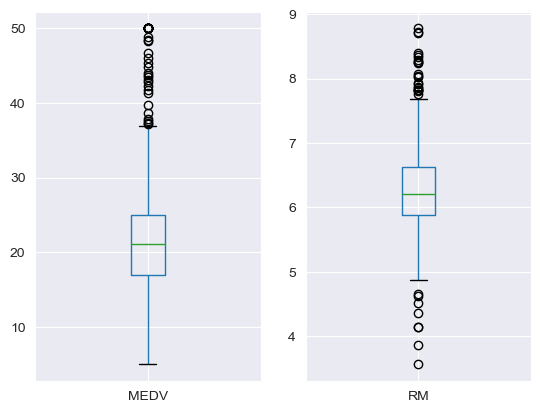

In [201]:
fig, axes = plt.subplots(ncols=2)
data.boxplot(column=['MEDV'], ax=axes[0])
data.boxplot(column='RM', ax=axes[1])

In [202]:
min(data['RM'])

3.561

I did a machine learning course once and there was something about this dataset. The guy there noticed that there are places with high number of rooms and low price - so these are probably some areas with dormitories. The MEDV variable was casted so that prices >USD50k are USD50k. We can use it later in the analysis.

## b) Build a linear regression of one of the features over the other. Obtain a normal probability plot of the standardized residuals from this regression. Does the normal probability plot indicate acceptable normality, or is there any skewness? If a skewness, what is the type of it?


In [203]:
def linear_regression(
        x,
        y,
        xlabel,
        ylabel,
        title,
):
    # calculate the coefficients of the linear regression using numpy's polyfit function
    beta = np.polyfit(x, y, deg=1)

    # make predictions using the linear regression
    predictions = x * beta[0] + beta[1]

    # create a scatter plot of the data and overlay a line plot of the linear regression
    ax = sns.regplot(x=x, y=y, fit_reg=False, scatter_kws={'alpha':0.5})
    ax.set(
        xlabel=xlabel, 
        ylabel=ylabel,
        title=title
    )
    plt.plot(x, predictions, color='red')

    # show the plot
    plt.show()
    print(f"Beta_1: {beta[0]}")
    print(f"Beta_0: {beta[1]}")
    
    return predictions, beta

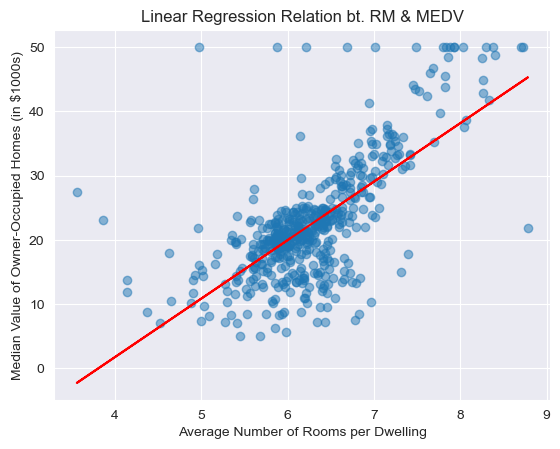

Beta_1: 9.103481556152992
Beta_0: -34.67691790965094


In [204]:
predictions, beta = linear_regression(
       x,
       y,
       'Average Number of Rooms per Dwelling', 
       'Median Value of Owner-Occupied Homes (in $1000s)', 
       'Linear Regression Relation bt. RM & MEDV',
)

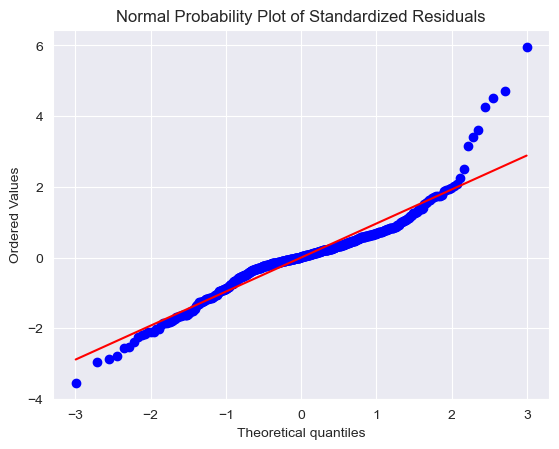

In [205]:
def plot_stand_residuals(y, predictions):
    # calculate the standardized residuals from the linear regression
    residuals = y - predictions
    standardized_residuals = stats.zscore(residuals)

    # create a normal probability plot of the standardized residuals
    stats.probplot(standardized_residuals, plot=plt)
    plt.title('Normal Probability Plot of Standardized Residuals')

    # show the plot
    plt.show()

plot_stand_residuals(y, predictions)


## ADD COMMENT HERE

## Take the natural log of both of the variables and perform a linear regression on the transformed features. Obtain a normal probability plot of the standardized residuals from this regression. Discuss if this probability plot indicates an acceptable level of normality?

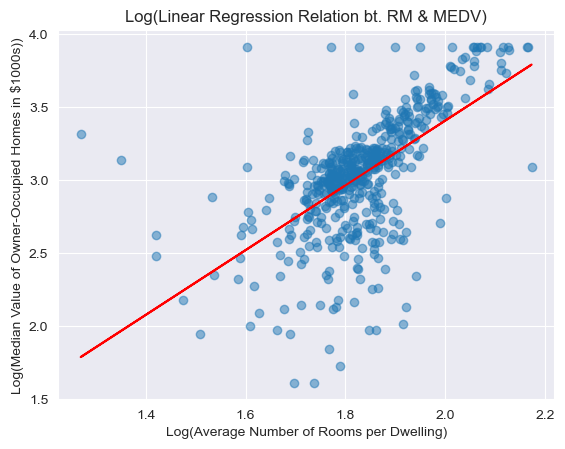

Beta_1: 2.221177832876626
Beta_0: -1.0344410954902656


In [206]:
x_log = np.log(x)
y_log = np.log(y)

log_predictions, _ = linear_regression(
        x_log,
        y_log,
        'Log(Average Number of Rooms per Dwelling)',
        'Log(Median Value of Owner-Occupied Homes in $1000s))',
        'Log(Linear Regression Relation bt. RM & MEDV)',
)

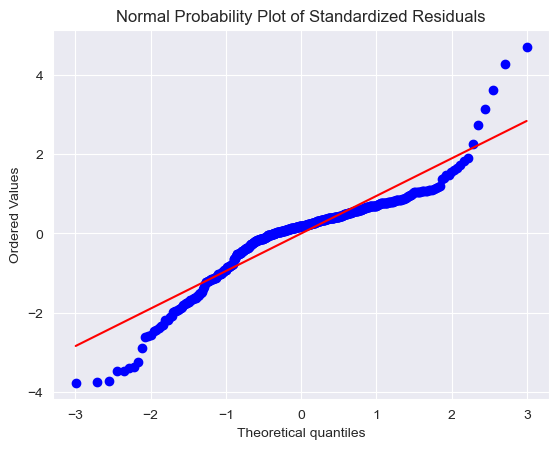

In [207]:
plot_stand_residuals(y_log, log_predictions)

This one not acceptable, the first one yes I think.

### d) Write the population regression equation for your model. Interpret the meaning of the values of the parameters $\beta_0$ and $\beta_1$.

$MEDV = -34.68 + 9.10 \cdot RM + \epsilon$

The $\beta_0=-34.68$ parameter in this model results from the fact that the lowest value of $RM$ variable is above 3 and the corresponding median housing price. The model predicts negative median price for houses with slightly lower average number of rooms than 4, which is not a meaningful prediction.
The $\beta_1=9.10$ parameter is much more interesting, indicating that on average, a unitary increase in an average number of rooms in the dwelling corresponded to an increase of a median house price by 10,000 USD.

### e) Find the correlation and determinacy coefficients. Analyse and comment on the meaning of both

In [208]:
from sklearn.metrics import r2_score
print('Coefficient of Determinacy:',round(r2_score(y_true=y, y_pred=predictions),2))

Coefficient of Determinacy: 0.48


Since $\beta_1$ is positive, $r=\sqrt{r^2}$

In [209]:
print(f"Correltaion coefficient: {round(np.sqrt(r2_score(y_true=y, y_pred=predictions)),2)}")

Correltaion coefficient: 0.7


$r^2$ indicates that the average number of rooms in a dwelling accounts for 48% of variability in median house price. But there are other factors influencing it as well.

$r$ value indicates that the median house price and average number of rooms in a dwelling are positively correlated - an higher number of rooms corresponds to a higher median house price.

### f) Test the statistical hypothesis for determining whether a linear relationship exists between the chosen variables.

First we analyze the model assumptions:

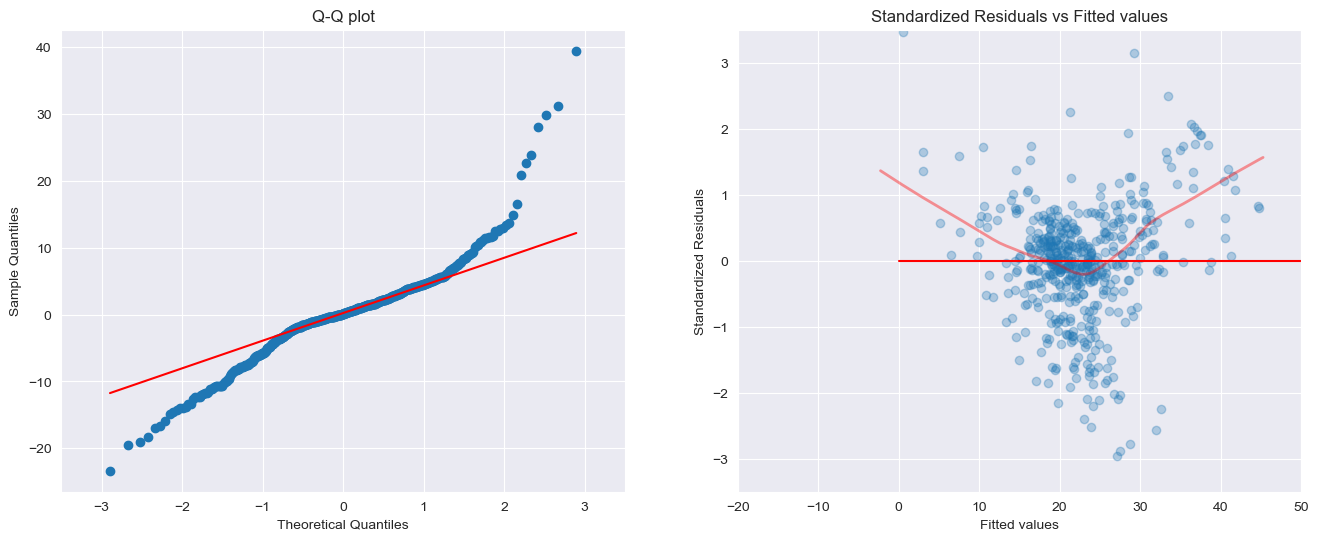

In [210]:
ones_vector = np.ones(len(x)) 

# append constant term as a column of x
x = np.c_[ones_vector, x]
beta = np.flip(beta)
beta = np.reshape(beta,(-1,1))

fig, axs = plt.subplots(ncols=2, # Set the number of columns to split the figure in
                        figsize=(16, 6)) # size of the whole figure

# re-computing our model values
predictions = np.dot(x,beta)
residuals = y - predictions[:,0]
degrees_of_freedom = len(x) - x.shape[1]

sm.qqplot(residuals, 
          stats.t,
          distargs=(degrees_of_freedom,), 
          line='q', 
          ax=axs[0])
axs[0].set_title(label = 'Q-Q plot')
axs[0].set_xlim(-3.5,3.5)


residuals_standard_error = np.sqrt( (1/degrees_of_freedom) *  np.sum(residuals ** 2))
mean_independent_variable = np.mean(x[:,1])
leverage = ( (1/len(x)) 
             + (((x[:,1] - mean_independent_variable)**2) 
                / np.sum((x[:,1] - mean_independent_variable)**2)) )
standardized_rediduals = residuals / (residuals_standard_error * np.sqrt( 1 - leverage))


sns.regplot(x=predictions[:,0], 
            y=standardized_rediduals, 
            ax=axs[1],
            lowess=True, 
            scatter_kws={'alpha':0.3}, 
            line_kws={"color":"r","alpha":0.4,"lw":2})
plt.plot(np.arange(len(standardized_rediduals)), [0]*len(standardized_rediduals), 'r-')
axs[1].set_xlim(-20, 50)
axs[1].set_ylim(-3.5,3.5)
axs[1].set(ylabel='Standardized Residuals', 
           xlabel='Fitted values');
axs[1].set_title(label = 'Standardized Residuals vs Fitted values');

In [211]:
sigma_degrees_of_freedom = (x.shape[0]-x.shape[1])
sigma_sqr = np.sum(residuals**2)/ sigma_degrees_of_freedom

variance_covmatrix = np.linalg.inv(np.dot(x.T,x)) * sigma_sqr
coeff_stde = np.diag(np.sqrt(variance_covmatrix))

print('Coefficients\' Standard Errors:',coeff_stde)

Coefficients' Standard Errors: [2.65258899 0.41950079]


In [212]:
expected_value = 0.0

for i in range(len(beta)):    
    ttest = (beta[i] - expected_value) / coeff_stde[i]

    #Degrees of freedom
    df = x.shape[0] - (i+1)
    # https://stats.stackexchange.com/a/140395
    
    pval = stats.t.sf(np.abs(ttest), df)*2  # two-sided pvalue = Prob(abs(t)>tt)
    # https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html#t-test-and-ks-test


    print('Test statistc for coefficient estimate ',i,':',ttest,'| P-value:', np.round(pval,8))

Test statistc for coefficient estimate  0 : [-13.0728575] | P-value: [0.]
Test statistc for coefficient estimate  1 : [21.70074943] | P-value: [0.]


The p-value is 0, therefore we do not reject the null hypothesis that there does not exist a linear relationship

### g) Construct and interpret a 95% confidence interval for the unknown true slope of the regression line

In [213]:
def get_95p_confidence_intervals(x, beta):
    df = (x.shape[0]-x.shape[1])
    t_student_values = stats.t.ppf( [.025,.975], df)
    stde = np.reshape(coeff_stde,(-1,1))
    return beta + (t_student_values * stde)

In [214]:
get_95p_confidence_intervals(x, beta)[1]

array([8.27929196, 9.92767116])

With 95% confidence we can conclude that the median price and avg number of rooms are linearly related.

### h) Construct a 95% confidence interval for the population correlation coefficient. Interpret the results.

In [215]:
def get_95p_correlation_interval(y, predictions):
    r2 = r2_score(y_true=y, y_pred=predictions)
    r = np.sqrt(r2)
    df = len(predictions) - 2
    t = stats.t.ppf(0.025, df)

    return [r - t*np.sqrt((1-r2)/df), r + t*np.sqrt((1-r2)/df)]

get_95p_correlation_interval(y, predictions)

[0.7583197961393785, 0.6324092419203212]

With 95% confidence we can conclude that the median price and avg number of rooms are positively correlated.

### i) Construct and interpret a 95% confidence interval for the mean of the y‐variable at a fixed value of your choice of the other variable. Interpret your result and indicate if the prediction interval is useful.

The analysis is performed for $RM = 6$

In [218]:
def get_mean_interval_for_y_given_x(x, y, predictions, beta, x_fixed=6):
    x = x[:, 1]
    SSE = np.sum((y-predictions[0])**2)
    MSE = SSE/(len(x) - 2 - 1)
    s = np.sqrt(MSE)
    df = len(y) - 2
    t = stats.t.ppf(0.025, df)
    x_mu = np.mean(x)
    dy = t*s*np.sqrt(1/len(x) + (x_fixed - x_mu)**2 / np.sum(((x - x_mu)**2)))
    yp = np.dot([1, x_fixed], beta)[0]

    return [yp+dy, yp-dy]

get_mean_interval_for_y_given_x(x, y, predictions, beta)

[19.06612175511183, 20.821821099422202]

We are 95% confident that houses with 6 rooms will have a mean cost between 19066 USD and 20821 USD. This is a narrow interval thus useful.

### j) Construct and interpret a 95% confidence interval for a randomly chosen value of the y‐variable at a fixed value of your choice of the other variable. Interpret your result and indicate if the prediction interval is useful.

In [219]:
def get_pred_interval_for_y_given_x(x, y, predictions, beta, x_fixed=6):
    x = x[:, 1]
    SSE = np.sum((y-predictions[0])**2)
    MSE = SSE/(len(x) - 2 - 1)
    s = np.sqrt(MSE)
    df = len(y) - 2
    t = stats.t.ppf(0.025, df)
    x_mu = np.mean(x)
    dy = t*s*np.sqrt(1 + 1/len(x) + (x_fixed - x_mu)**2 / np.sum(((x - x_mu)**2)))
    yp = np.dot([1, x_fixed], beta)[0]

    return [yp+dy, yp-dy]

get_pred_interval_for_y_given_x(x, y, predictions, beta)

[1.634253750642248, 38.25368910389179]

We are 95% confident that the price of a randomly chosen 6-room dwelling will be between 1634 USD and 38253 USD. This interval is very wide so it is not very useful.